In [1]:
! pip install -r requirements.txt

In [32]:
import pandas as pd
import os
from data_preprocessing import preprocess_dataframe
from descriptor_calculation import descriptor_cal
from train_func import train_models
import shutil
import os
import deepchem as dc
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import os


In [3]:
PATH= "All Properties with Finguprints_3.csv"
descriptor_list= ["Morgan fingerprints"] 

In [4]:
df = pd.read_csv(PATH).head(10)
df.head()

,Sr.No,Smiles,Solvent,AbsorptioMax (nm),EmissionMax (nm),Fluorescent labeling,Total Molweight,molFormula,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Relative PSA,Polar Surface Area,Druglikeness,Rotatable Bonds,Weiner
0,1,N#Cc1cc2ccc(O)cc2oc1=O,O,355.0,410.00,Yes,187.154,C10H5NO3,0.8375,-2.346,4,1,140.28,0.354290,70.32,-4.14950,0,288.0
1,2,N#Cc1cc2ccc([O-])cc2oc1=O,O,408.0,450.00,Yes,186.146,C10H4NO3,-0.7405,-2.346,4,0,141.46,0.359680,73.15,-4.14950,0,288.0
2,3,CCCCCCCCCCCC#CC#CCCCCCCCCCN1C(=O)c2ccc3c4ccc5c...,ClC(Cl)Cl,526.0,535.00,Yes,1061.540,C73H92N2O4,24.1650,-27.266,6,0,933.68,0.063469,74.76,-20.14900,39,55900.0
3,4,[O-]c1c(-c2nc3ccccc3s2)cc2ccc3cccc4ccc1c2c34,CC#N,514.0,553.72,Yes,350.420,C23H12NOS,4.5981,-7.337,2,0,249.23,0.183000,64.19,0.73261,1,1522.0
4,5,[O-]c1c(-c2nc3ccccc3s2)cc2ccc3cccc4ccc1c2c34,CS(C)=O,524.0,555.00,Yes,350.420,C23H12NOS,4.5981,-7.337,2,0,249.23,0.183000,64.19,0.73261,1,1522.0


In [5]:
df.shape

(10, 18)

In [6]:
df = df.loc[df['Fluorescent labeling'] == 'Yes']
df.shape

(10, 18)

In [7]:
df["Fluorescent labeling"].to_list()

['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']

In [8]:
featurizer = dc.feat.CircularFingerprint(radius=3, size=1024)
discriptors = featurizer.featurize(df["Smiles"].to_list())
smiles_desc = pd.DataFrame(data=discriptors)

In [9]:
smiles_desc.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
smiles_desc.shape

(10, 1024)

In [11]:
featurizer = dc.feat.CircularFingerprint(radius=3, size=1024)
discriptors = featurizer.featurize(df["Solvent"].to_list())
solvent_desc = pd.DataFrame(data=discriptors)

In [12]:
solvent_desc.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
solvent_desc.shape

(10, 1024)

In [36]:
x = pd.concat([smiles_desc, solvent_desc], axis=1)

In [37]:
x

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
y = df["AbsorptioMax (nm)"]

In [26]:
y

0    355.0
1    408.0
2    526.0
3    514.0
4    524.0
5    350.0
6    361.0
7    367.0
8    373.0
9    384.0
Name: AbsorptioMax (nm), dtype: float64

In [31]:

def train_regression(X,y,PATH):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define a dictionary of regression models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'ElasticNet Regression': ElasticNet(),
        'Decision Tree Regression': DecisionTreeRegressor(),
        'Random Forest Regression': RandomForestRegressor(),
        'Support Vector Regression': SVR(),
        'K-Nearest Neighbors Regression': KNeighborsRegressor()
    }

    # Define a list of evaluation metrics to evaluate the models
    metrics = [mean_absolute_error, mean_squared_error, r2_score]

    # Create a results folder if it doesn't exist
    if not os.path.exists(PATH):
        os.makedirs(PATH)

    # Loop through each model, train it, and evaluate its performance
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results = {}
        for metric in metrics:
            metric_name = metric.__name__
            results[metric_name] = metric(y_test, y_pred)
        results_df = pd.DataFrame.from_dict(results, orient='index', columns=[name])
        results_df.to_csv(f'{PATH}/{name}.csv')


In [38]:
train_regression(x,y,"regression_results")

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import os

def compare_models(PATH):
    # Get the list of CSV files in the results folder
    files = [os.path.join(PATH, f) for f in os.listdir(PATH) if f.endswith('.csv')]

    # Read the results into a dataframe
    results_df = pd.DataFrame()
    for file in files:
        model_name = os.path.splitext(os.path.basename(file))[0]
        df = pd.read_csv(file, index_col=0)
        df.columns = [model_name]
        results_df = pd.concat([results_df, df], axis=1)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.title('Model Comparison')
    plt.ylabel('Score')
    results_df.mean().sort_values().plot(kind='barh', color='green')
    plt.show()


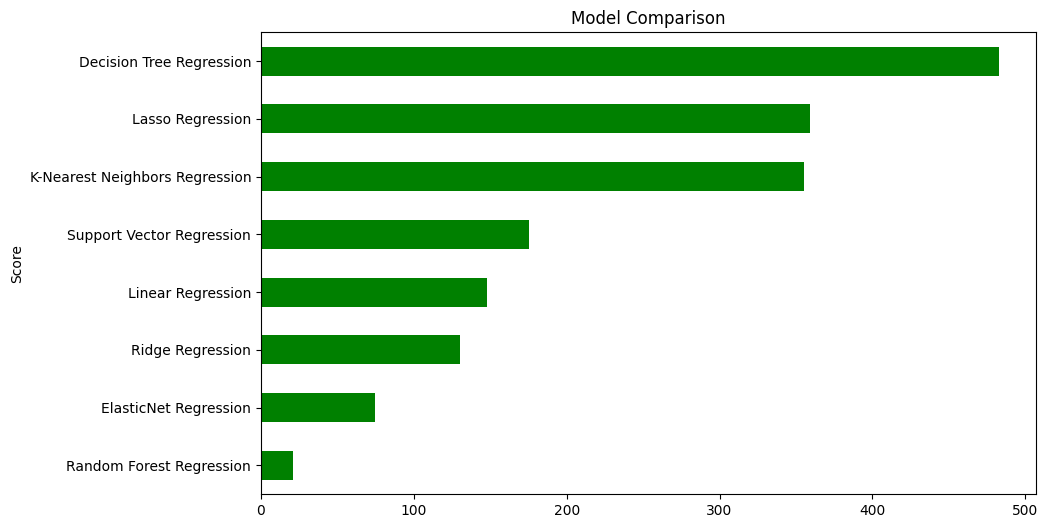

In [44]:
compare_models("regression_results")

In [42]:
import matplotlib.pyplot as plt

def plot_model_comparison(PATH):
    # Get a list of all CSV files in the specified folder
    files = [f for f in os.listdir(PATH) if f.endswith('.csv')]

    # Create a dictionary to store the R-Squared scores for each model
    r2_scores = {}

    # Loop through each CSV file, extract the R-Squared score, and add it to the dictionary
    for file in files:
        df = pd.read_csv(os.path.join(PATH, file), index_col=0)
        model_name = file.split('.')[0]
        r2_score = df.loc['r2_score'][model_name]
        r2_scores[model_name] = r2_score

    # Create a bar plot of the R-Squared scores for each model
    plt.bar(range(len(r2_scores)), list(r2_scores.values()), align='center')
    plt.xticks(range(len(r2_scores)), list(r2_scores.keys()))
    plt.ylabel('R-Squared Score')
    plt.title('Model Comparison')
    plt.show()


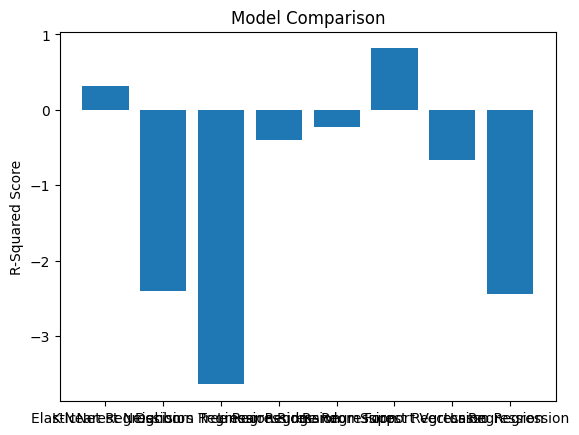

In [43]:
plot_model_comparison("regression_results")

In [46]:
import matplotlib.pyplot as plt

def plot_model_comparison(PATH):
    # Get a list of all CSV files in the specified folder
    files = [f for f in os.listdir(PATH) if f.endswith('.csv')]

    # Create a dictionary to store the R-Squared scores for each model
    r2_scores = {}

    # Loop through each CSV file, extract the R-Squared score, and add it to the dictionary
    for file in files:
        df = pd.read_csv(os.path.join(PATH, file), index_col=0)
        model_name = file.split('.')[0]
        r2_score = df.loc['r2_score'][model_name]
        r2_scores[model_name] = r2_score

    # Create a horizontal bar plot of the R-Squared scores for each model
    plt.barh(range(len(r2_scores)), list(r2_scores.values()), align='center')
    plt.yticks(range(len(r2_scores)), list(r2_scores.keys()))
    plt.xlabel('R-Squared Score')
    plt.title('Model Comparison')
    plt.show()


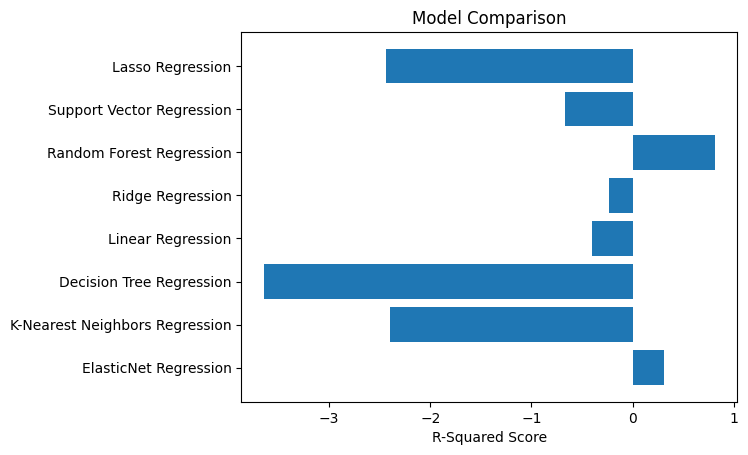

In [47]:
plot_model_comparison("regression_results")